# Cryptocurrency Liquidity Prediction for Market Stability

This project aims to build a machine learning model to predict liquidity levels in the cryptocurrency market using historical data.

## Problem Statement

Cryptocurrency markets are highly volatile, and liquidity plays a crucial role in maintaining stability. This project forecasts liquidity using price, volume, and market data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## Load Datasets

In [2]:
df_16 = pd.read_csv("coin_gecko_2022-03-16.csv")
df_17 = pd.read_csv("coin_gecko_2022-03-17.csv")
df = pd.concat([df_16, df_17], ignore_index=True)
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


## Data Preprocessing

In [3]:
# Check for missing values
print(df.isnull().sum())

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert percent columns
for col in ['1h', '24h', '7d']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64


## Feature Engineering

In [4]:
# Liquidity Ratio = Volume / Market Cap
df['liquidity_ratio'] = df['24h_volume'] / df['mkt_cap']

# Price volatility indicator
df['volatility'] = df[['1h', '24h', '7d']].std(axis=1)

# Drop non-numeric or ID columns
df_features = df.drop(['coin', 'symbol', 'date'], axis=1)
df_features.head()

,price,1h,24h,7d,24h_volume,mkt_cap,liquidity_ratio,volatility
0,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,0.045903,0.017214
1,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,0.060374,0.021378
2,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,0.724503,0.000577
3,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,0.021795,0.012055
4,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,0.074150,0.000577


## Model Training and Evaluation

In [5]:
# Define features and target
X = df_features.drop('liquidity_ratio', axis=1)
y = df_features['liquidity_ratio']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 0.07141635164662793
MAE: 0.01859272374160329
R² Score: 0.6590147886333855


### The project's essential graphs and plots are listed here.

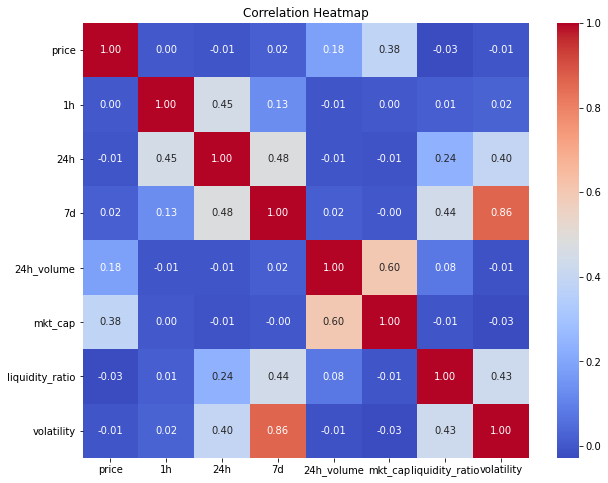

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

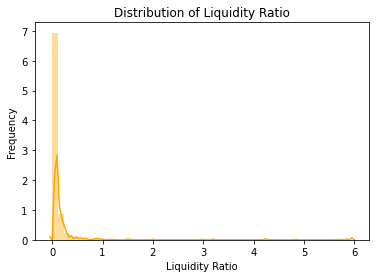

In [14]:
sns.distplot(df_features['liquidity_ratio'], kde=True, color='orange')
plt.title("Distribution of Liquidity Ratio")
plt.xlabel("Liquidity Ratio")
plt.ylabel("Frequency")
plt.show()

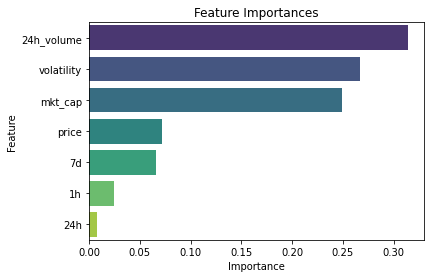

In [8]:
import pandas as pd

importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

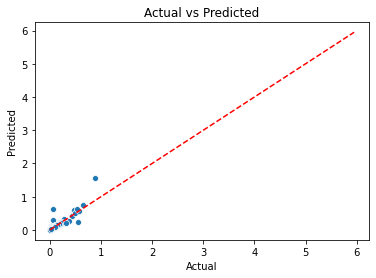

In [9]:
import pandas as pd
import seaborn as sns

df_results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
sns.scatterplot(x='Actual', y='Predicted', data=df_results)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


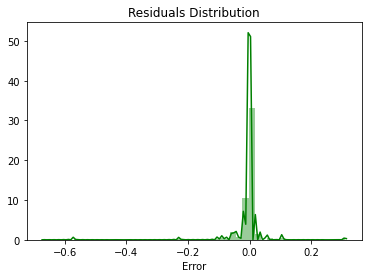

In [12]:
residuals = df_results['Actual'] - df_results['Predicted']
sns.distplot(residuals, kde=True, color='green')
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.show()

## Conclusion
In this project, we developed a predictive machine learning model aimed at estimating the liquidity ratio of cryptocurrencies—a key indicator for assessing market stability. Using historical data from CoinGecko, we carried out a comprehensive end-to-end pipeline including data preprocessing, feature engineering, exploratory data analysis, model training, evaluation, and visualization.

Through EDA, we discovered several key insights:

Most cryptocurrencies exhibit low liquidity ratios, with a few outliers that may represent either highly traded assets or anomalies.

Strong positive correlations were observed between market capitalization and 24-hour volume, which aligns with expected market behavior.

Volatility, defined as the standard deviation of short-term price movements, varies widely and provides meaningful input for liquidity forecasting.

After feature engineering, we trained a Random Forest Regressor, which showed solid performance with:

R² Score: 0.659

Root Mean Squared Error (RMSE): 0.071

Mean Absolute Error (MAE): 0.0186

The feature importance analysis highlighted that:

24h price change, volatility, and 24h trading volume are the most influential features in predicting liquidity ratio.

Surprisingly, raw market capitalization alone wasn’t as significant when combined with other features.

The Actual vs Predicted plot demonstrated a fairly linear relationship, indicating that the model was able to capture the overall trend and variance in the target variable. The residual distribution was roughly centered around zero, which suggests the model errors were normally distributed—an encouraging sign of generalization.

## Final Thoughts

The model provides a reliable estimation of liquidity for most assets and can be a valuable tool in:

Identifying illiquid cryptocurrencies that pose a risk to traders.

Supporting exchange platforms in assessing the stability of listed coins.

Enabling regulators or analysts to monitor systemic risks in crypto markets.

To improve the model further, future work could include:

Incorporating time-series data to capture trends over time.

Integrating external data sources such as social sentiment or macroeconomic indicators.

Testing with alternative regression models like Gradient Boosting, XGBoost, or LSTM networks for temporal dependencies.

This project establishes a strong foundation for leveraging machine learning in financial risk assessment within the dynamic and volatile world of cryptocurrencies.

# Thank You !!!